In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# import gmaps
import gmaps
# Import the API key.
from config import weather_api_key


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68355746dc15697c0fecdafdecf88a0b


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


617

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lagoa
Processing Record 2 of Set 1 | clyde river
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | vao
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | nguiu
City not found. Skipping...
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | karaul
City not found. Skipping...
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | burica
City not found. Skipping...
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | vardo
Processing Record 18 of Set 1 | kirakira
Processing Record 19 of Set 1 | rancho palos verdes
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | nouadhibou
P

Processing Record 37 of Set 4 | surt
Processing Record 38 of Set 4 | aguimes
Processing Record 39 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 4 | yurimaguas
Processing Record 41 of Set 4 | dutse
Processing Record 42 of Set 4 | aswan
Processing Record 43 of Set 4 | salinas
Processing Record 44 of Set 4 | hambantota
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | shache
Processing Record 47 of Set 4 | yumen
Processing Record 48 of Set 4 | sembabule
Processing Record 49 of Set 4 | yar-sale
Processing Record 50 of Set 4 | davila
Processing Record 1 of Set 5 | surab
Processing Record 2 of Set 5 | kamenskiy
Processing Record 3 of Set 5 | nogliki
Processing Record 4 of Set 5 | isangel
Processing Record 5 of Set 5 | mitu
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | altagracia de orituco
Processing Record 8 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 9

Processing Record 29 of Set 8 | lasa
Processing Record 30 of Set 8 | tuatapere
Processing Record 31 of Set 8 | kyakhta
Processing Record 32 of Set 8 | burns lake
Processing Record 33 of Set 8 | severo-kurilsk
Processing Record 34 of Set 8 | kununurra
Processing Record 35 of Set 8 | christiana
Processing Record 36 of Set 8 | villa sandino
Processing Record 37 of Set 8 | geraldton
Processing Record 38 of Set 8 | tezu
Processing Record 39 of Set 8 | buin
Processing Record 40 of Set 8 | marrakesh
Processing Record 41 of Set 8 | tucuman
Processing Record 42 of Set 8 | sambava
Processing Record 43 of Set 8 | visby
Processing Record 44 of Set 8 | pevek
Processing Record 45 of Set 8 | tomatlan
Processing Record 46 of Set 8 | deputatskiy
Processing Record 47 of Set 8 | pahrump
Processing Record 48 of Set 8 | that phanom
Processing Record 49 of Set 8 | moron
Processing Record 50 of Set 8 | pangkalanbuun
Processing Record 1 of Set 9 | belaya gora
Processing Record 2 of Set 9 | lompoc
Processing R

Processing Record 16 of Set 12 | kurilsk
Processing Record 17 of Set 12 | zheshart
Processing Record 18 of Set 12 | laredo
Processing Record 19 of Set 12 | okha
Processing Record 20 of Set 12 | yaan
Processing Record 21 of Set 12 | dekar
Processing Record 22 of Set 12 | aklavik
Processing Record 23 of Set 12 | wawa
Processing Record 24 of Set 12 | dalhousie
Processing Record 25 of Set 12 | methoni
Processing Record 26 of Set 12 | najran
Processing Record 27 of Set 12 | tombouctou
Processing Record 28 of Set 12 | umm lajj
Processing Record 29 of Set 12 | bundaberg
Processing Record 30 of Set 12 | nchelenge
Processing Record 31 of Set 12 | jamame
Processing Record 32 of Set 12 | salihorsk
Processing Record 33 of Set 12 | harper
Processing Record 34 of Set 12 | hondo
Processing Record 35 of Set 12 | champerico
Processing Record 36 of Set 12 | bereda
Processing Record 37 of Set 12 | jacmel
Processing Record 38 of Set 12 | kavaratti
Processing Record 39 of Set 12 | srivardhan
Processing Rec

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.0500,-27.9833,59.29,87,100,24.87,PT,2021-12-18 23:37:36
1,Clyde River,70.4692,-68.5914,3.43,85,100,12.66,CA,2021-12-18 23:37:36
2,Punta Arenas,-53.1500,-70.9167,64.51,45,0,26.46,CL,2021-12-18 23:37:37
3,Hasaki,35.7333,140.8333,30.60,39,69,4.92,JP,2021-12-18 23:37:37
4,Vao,-22.6667,167.4833,76.66,82,50,23.06,NC,2021-12-18 23:37:38
5,Upernavik,72.7868,-56.1549,15.66,68,75,3.96,GL,2021-12-18 23:37:38
6,Longyearbyen,78.2186,15.6401,22.84,80,0,6.91,SJ,2021-12-18 23:37:38
7,Rikitea,-23.1203,-134.9692,77.99,74,90,11.95,PF,2021-12-18 23:37:39
8,Thompson,55.7435,-97.8558,-20.04,76,20,0.00,CA,2021-12-18 23:35:50
9,Carnarvon,-24.8667,113.6333,69.87,60,0,20.71,AU,2021-12-18 23:37:39


In [8]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2021-12-18 23:37:36,39.0500,-27.9833,59.29,87,100,24.87
1,Clyde River,CA,2021-12-18 23:37:36,70.4692,-68.5914,3.43,85,100,12.66
2,Punta Arenas,CL,2021-12-18 23:37:37,-53.1500,-70.9167,64.51,45,0,26.46
3,Hasaki,JP,2021-12-18 23:37:37,35.7333,140.8333,30.60,39,69,4.92
4,Vao,NC,2021-12-18 23:37:38,-22.6667,167.4833,76.66,82,50,23.06
5,Upernavik,GL,2021-12-18 23:37:38,72.7868,-56.1549,15.66,68,75,3.96
6,Longyearbyen,SJ,2021-12-18 23:37:38,78.2186,15.6401,22.84,80,0,6.91
7,Rikitea,PF,2021-12-18 23:37:39,-23.1203,-134.9692,77.99,74,90,11.95
8,Thompson,CA,2021-12-18 23:35:50,55.7435,-97.8558,-20.04,76,20,0.00
9,Carnarvon,AU,2021-12-18 23:37:39,-24.8667,113.6333,69.87,60,0,20.71


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


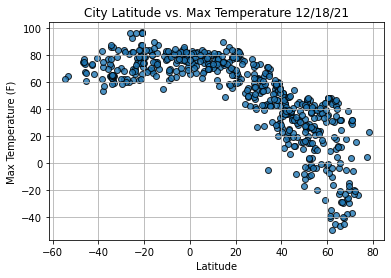

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# plt.gca().invert_yaxis()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

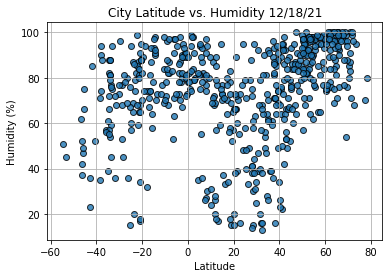

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


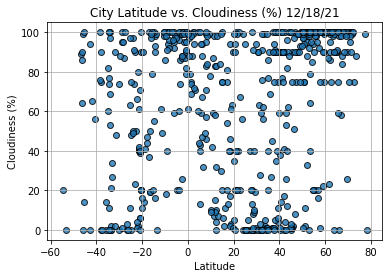

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

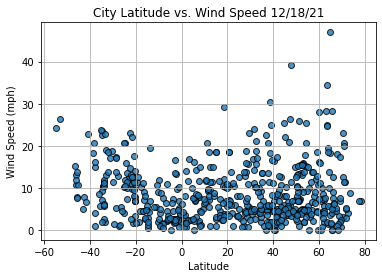

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [15]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
      
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
index13=city_data_df.loc[13]
index13

City                        Vardo
Country                        NO
Date          2021-12-18 23:37:41
Lat                       70.3705
Lng                       31.1107
Max Temp                    30.18
Humidity                       80
Cloudiness                     75
Wind Speed                  23.02
Name: 13, dtype: object

In [17]:
city_data_df["Lat"]>= 0

0       True
1       True
2      False
3       True
4      False
       ...  
564     True
565    False
566     True
567     True
568     True
Name: Lat, Length: 569, dtype: bool

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2021-12-18 23:37:36,39.0500,-27.9833,59.29,87,100,24.87
1,Clyde River,CA,2021-12-18 23:37:36,70.4692,-68.5914,3.43,85,100,12.66
3,Hasaki,JP,2021-12-18 23:37:37,35.7333,140.8333,30.60,39,69,4.92
5,Upernavik,GL,2021-12-18 23:37:38,72.7868,-56.1549,15.66,68,75,3.96
6,Longyearbyen,SJ,2021-12-18 23:37:38,78.2186,15.6401,22.84,80,0,6.91


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

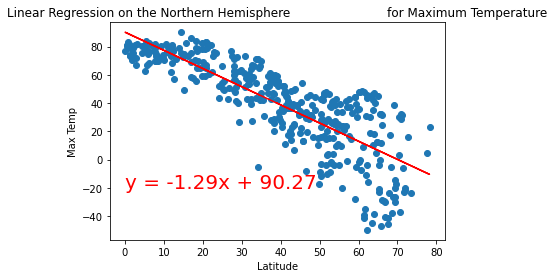

y = -1.29x + 90.27
The r-value is: -0.816


In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

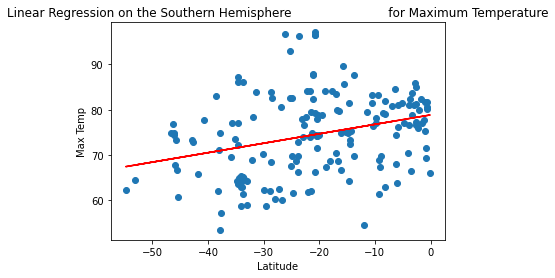

y = 0.21x + 78.87
The r-value is: 0.308


In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40,50))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values )
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

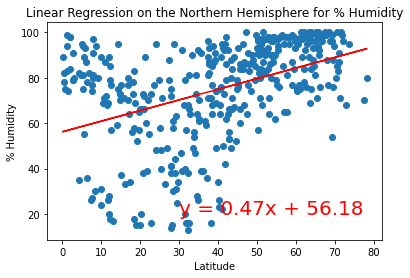

The r-value is: 0.308


In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(30,20))

print(f"The r-value is: {r_value:.3f}")



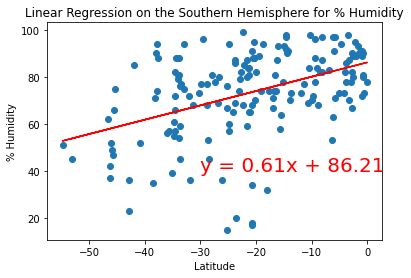

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-30,40))


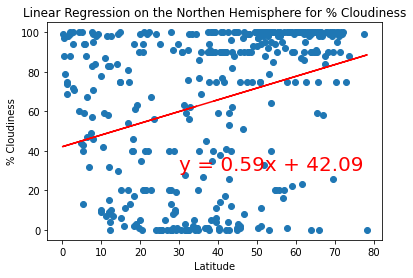

In [24]:
# Linear regression on the Northen Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northen Hemisphere for % Cloudiness','% Cloudiness',(30,30))


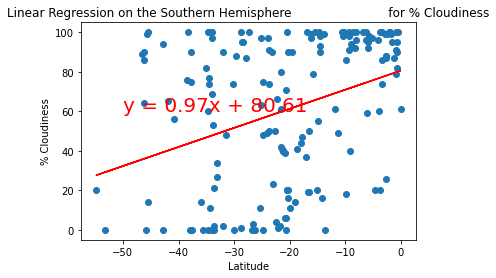

slope is:0.966,intercept is:80.609,r_value is:0.346,P_value is : 0.000,Standard Error is :0.204


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values )
print(f"slope is:{slope:.3f},intercept is:{intercept:.3f},r_value is:{r_value:.3f},P_value is : {p_value:.3f},Standard Error is :{std_err:.3f}")

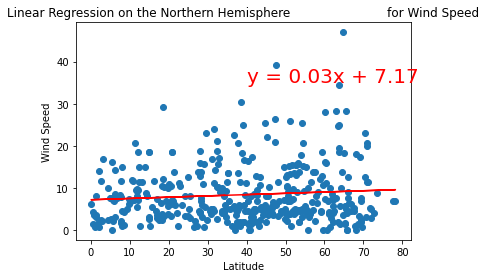

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

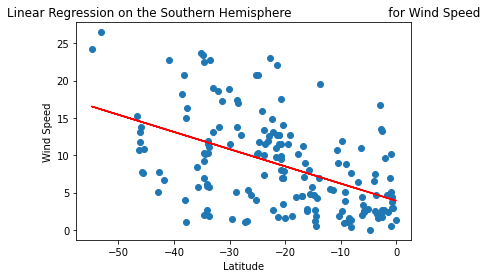

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [28]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
import ipywidgets as widgets

# Import the API key.
from config import gkey

In [29]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Lagoa,PT,2021-12-18 23:37:36,39.0500,-27.9833,59.29,87,100,24.87
1,1,Clyde River,CA,2021-12-18 23:37:36,70.4692,-68.5914,3.43,85,100,12.66
2,2,Punta Arenas,CL,2021-12-18 23:37:37,-53.1500,-70.9167,64.51,45,0,26.46
3,3,Hasaki,JP,2021-12-18 23:37:37,35.7333,140.8333,30.60,39,69,4.92
4,4,Vao,NC,2021-12-18 23:37:38,-22.6667,167.4833,76.66,82,50,23.06


In [30]:
# get the data types
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [31]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=gkey)

In [32]:
# # 1. Assign the locations to an array of latitude and longitude pairs.
# locations = [latitude, longitude]
# # 2. Assign the weights variable to some values.
# temperatures = # an array of length equal to the locations array length
# # 3. Assign the figure variable to the gmaps.figure() attribute.
# fig = gmaps.figure()
# # 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
# heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# # 5. Add the heatmap layer.
# fig.add_layer(heatmap_layer)
# # 6. Call the figure to plot the data.
# fig

In [33]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [34]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
gmaps.__version__

'0.9.0'

In [36]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [40]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,4,Vao,NC,2021-12-18 23:37:38,-22.6667,167.4833,76.66,82,50,23.06
7,7,Rikitea,PF,2021-12-18 23:37:39,-23.1203,-134.9692,77.99,74,90,11.95
11,11,Kapaa,US,2021-12-18 23:37:40,22.0752,-159.3190,80.92,70,40,4.00
14,14,Kirakira,SB,2021-12-18 23:37:41,-10.4544,161.9205,81.46,84,98,8.97
20,20,Cabo San Lucas,MX,2021-12-18 23:33:56,22.8909,-109.9124,76.30,73,20,10.36
21,21,Mareeba,AU,2021-12-18 23:37:43,-17.0000,145.4333,83.44,67,37,4.50
22,22,Robertsport,LR,2021-12-18 23:37:44,6.7533,-11.3686,81.27,82,32,7.49
23,23,Hilo,US,2021-12-18 23:36:58,19.7297,-155.0900,82.27,57,90,5.75
26,26,Placido De Castro,BR,2021-12-18 23:37:45,-10.3353,-67.1856,76.44,98,100,1.92
35,35,Gorontalo,ID,2021-12-18 23:35:19,0.5412,123.0595,81.28,82,97,1.45


In [41]:
preferred_cities_df.count()

City_ID       131
City          131
Country       131
Date          131
Lat           131
Lng           131
Max Temp      131
Humidity      131
Cloudiness    131
Wind Speed    131
dtype: int64

In [42]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
4,Vao,NC,76.66,-22.6667,167.4833,
7,Rikitea,PF,77.99,-23.1203,-134.9692,
11,Kapaa,US,80.92,22.0752,-159.3190,
14,Kirakira,SB,81.46,-10.4544,161.9205,
20,Cabo San Lucas,MX,76.30,22.8909,-109.9124,
21,Mareeba,AU,83.44,-17.0000,145.4333,
22,Robertsport,LR,81.27,6.7533,-11.3686,
23,Hilo,US,82.27,19.7297,-155.0900,
26,Placido De Castro,BR,76.44,-10.3353,-67.1856,
35,Gorontalo,ID,81.28,0.5412,123.0595,


In [43]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": gkey
}

In [44]:
# Dependencies and Setup
import requests
import gmaps

# Import API key
from config import gkey

In [45]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": gkey,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'Aap_uEDI-YI_5YyNDK0AtcgGzVflolfYgJpmdfQHTagNB2I0oQqLbMZDdYEsFvmgN4gEI5iO_62TnmDy4ln6vcSchYY76soIOdgLGTCQAYyuFMsvLFHZRNUWEAQKtYoOIrFQcSZgUoTsNSiIdJKUZj93qGS01Y66drpFKNXK-vgfQyKbzZemvI379VRNkxf9j5_ycVy8bgDWi_E5V910hX6aVG97IstuXkbQh500_ixc4S2lJEqv6qS-2fay7pqDn3qgzlK4oioEREj0L_ssU1p86E687sVcFdTbcl7kmahfNmYsq0LboadBOe9VsgsbBX5UgBVlyRzlP4cQNs-zGeT0ilSO62PZUwf3o7T9PTE4NnjnJf5LU8IkpnaUnHj18HPLFdPbGYpv7E81FYruBDQ2ZxS7n7CIe5foX9uHrxXtitzN9pHd7j3x1jYm',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [46]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found...skipping.")
        

Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.


In [47]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
4,Vao,NC,76.66,-22.6667,167.4833,Hotel Kou-Bugny
7,Rikitea,PF,77.99,-23.1203,-134.9692,People ThankYou
11,Kapaa,US,80.92,22.0752,-159.3190,Sheraton Kauai Coconut Beach Resort
14,Kirakira,SB,81.46,-10.4544,161.9205,SanBiz Lodge
20,Cabo San Lucas,MX,76.30,22.8909,-109.9124,Hotel Tesoro Los Cabos
21,Mareeba,AU,83.44,-17.0000,145.4333,Trinity Plains Tourist Park
22,Robertsport,LR,81.27,6.7533,-11.3686,Kwepunha Retreat
23,Hilo,US,82.27,19.7297,-155.0900,Hilo Hawaiian Hotel
26,Placido De Castro,BR,76.44,-10.3353,-67.1856,Hotel Carioca
35,Gorontalo,ID,81.28,0.5412,123.0595,Maqna Hotel by Prasanthi


In [48]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [49]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [50]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [51]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [52]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))